In [1]:
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [2]:
# load in data set
df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
# initially inspect the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# determine where nulls are in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

It appears that we only have two columns that contain null values: waterfront and yr_renovated.

In [5]:
df.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [6]:
df.dropna(subset=['waterfront', 'view'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19164 non-null  int64  
 1   date           19164 non-null  object 
 2   price          19164 non-null  float64
 3   bedrooms       19164 non-null  int64  
 4   bathrooms      19164 non-null  float64
 5   sqft_living    19164 non-null  int64  
 6   sqft_lot       19164 non-null  int64  
 7   floors         19164 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           19164 non-null  object 
 10  condition      19164 non-null  object 
 11  grade          19164 non-null  object 
 12  sqft_above     19164 non-null  int64  
 13  sqft_basement  19164 non-null  object 
 14  yr_built       19164 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        19164 non-null  int64  
 17  lat            19164 non-null  float64
 18  long  

In [8]:
df.yr_renovated.value_counts()

0.0       15111
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

Based on the above value counts, we will drop the yr_renovated column.

In [9]:
df.drop(columns='yr_renovated', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19164 non-null  int64  
 1   date           19164 non-null  object 
 2   price          19164 non-null  float64
 3   bedrooms       19164 non-null  int64  
 4   bathrooms      19164 non-null  float64
 5   sqft_living    19164 non-null  int64  
 6   sqft_lot       19164 non-null  int64  
 7   floors         19164 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           19164 non-null  object 
 10  condition      19164 non-null  object 
 11  grade          19164 non-null  object 
 12  sqft_above     19164 non-null  int64  
 13  sqft_basement  19164 non-null  object 
 14  yr_built       19164 non-null  int64  
 15  zipcode        19164 non-null  int64  
 16  lat            19164 non-null  float64
 17  long           19164 non-null  float64
 18  sqft_l

In [11]:
df.zipcode.value_counts()

98103    539
98038    525
98115    513
98052    506
98117    495
        ... 
98102     89
98010     87
98024     72
98148     51
98039     45
Name: zipcode, Length: 70, dtype: int64

In [12]:
df_seattle = df[(df['zipcode'] >= 98101) & (df['zipcode'] <= 98199)]

In [13]:
df_seattle.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,98146,47.5123,-122.337,1780,8113
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,Good,7 Average,860,300.0,1942,98115,47.6900,-122.292,1330,6000
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,NO,NONE,Average,7 Average,1810,0.0,1900,98107,47.6700,-122.394,1360,4850


In [14]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7949 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7949 non-null   int64  
 1   date           7949 non-null   object 
 2   price          7949 non-null   float64
 3   bedrooms       7949 non-null   int64  
 4   bathrooms      7949 non-null   float64
 5   sqft_living    7949 non-null   int64  
 6   sqft_lot       7949 non-null   int64  
 7   floors         7949 non-null   float64
 8   waterfront     7949 non-null   object 
 9   view           7949 non-null   object 
 10  condition      7949 non-null   object 
 11  grade          7949 non-null   object 
 12  sqft_above     7949 non-null   int64  
 13  sqft_basement  7949 non-null   object 
 14  yr_built       7949 non-null   int64  
 15  zipcode        7949 non-null   int64  
 16  lat            7949 non-null   float64
 17  long           7949 non-null   float64
 18  sqft_li

<AxesSubplot:>

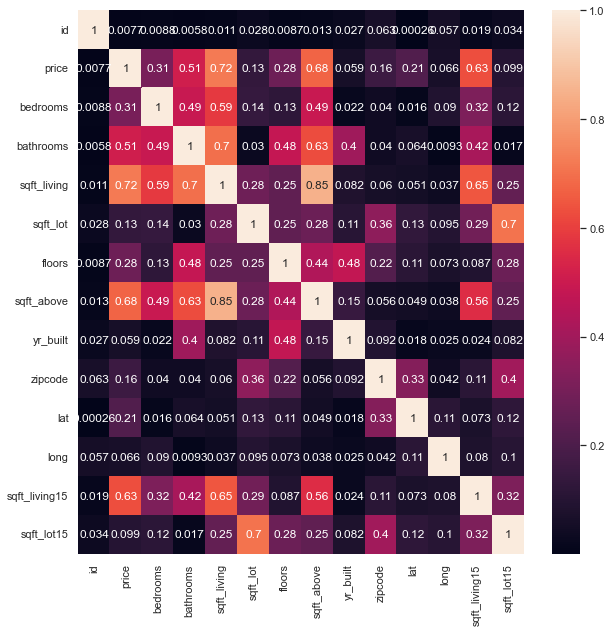

In [15]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(abs(df_seattle.corr()), annot=True)

# Create First Simple Model

In [16]:
# create test train split for data
from sklearn.model_selection import train_test_split

In [17]:
X = df_seattle.drop(columns='price', axis=1)
y = df_seattle['price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [19]:
print(X_train.shape, X_test.shape)

(5961, 19) (1988, 19)


In [20]:
slr = LinearRegression()
slr_fit = slr.fit(np.array(X_train['sqft_living']).reshape(-1, 1), np.array(y_train).reshape(-1,1))
slr_fit.score(np.array(X_test['sqft_living']).reshape(-1,1), np.array(y_test).reshape(-1,1))

0.47687019655645224

# Feature Engineering

In [21]:
# (1) Create a variable condition_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
condition_X_train = X_train[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(condition_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [22]:
trans_condition_X_train = ohe.transform(condition_X_train)

In [23]:
# (5a) Make the transformed data into a dataframe
encoded_X_train = pd.DataFrame(
    # Pass in NumPy array
    trans_condition_X_train,
    # Set the column names to the categories found by OHE
    columns='Cond_' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
encoded_X_train

,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good
17430,1.0,0.0,0.0,0.0,0.0
2722,1.0,0.0,0.0,0.0,0.0
9563,1.0,0.0,0.0,0.0,0.0
625,0.0,0.0,1.0,0.0,0.0
2097,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
5961,0.0,0.0,1.0,0.0,0.0
6606,1.0,0.0,0.0,0.0,0.0
5519,0.0,0.0,1.0,0.0,0.0
3731,0.0,0.0,0.0,0.0,1.0


In [24]:
# add our encoded condition columns to our df_seattle dataframe
df_seattle1 = pd.concat([X_train, encoded_X_train], axis=1)
df_seattle1.drop(columns='condition', axis=1, inplace=True)
df_seattle1.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good
17430,1959703070,10/29/2014,5,3.0,3730,5500,1.5,NO,NONE,7 Average,...,98102,47.6507,-122.320,1890,5500,1.0,0.0,0.0,0.0,0.0
2722,2770601741,11/6/2014,3,3.0,1490,2944,2.0,NO,NONE,7 Average,...,98199,47.6506,-122.384,1590,1600,1.0,0.0,0.0,0.0,0.0
9563,5589300205,8/5/2014,5,1.0,1680,9383,1.0,NO,NONE,7 Average,...,98155,47.7523,-122.311,1680,9458,1.0,0.0,0.0,0.0,0.0
625,7812800565,8/14/2014,3,1.0,960,6400,1.0,NO,NONE,6 Low Average,...,98178,47.4960,-122.239,1200,6600,0.0,0.0,1.0,0.0,0.0
2097,6414100111,11/5/2014,2,1.0,990,9223,1.0,NO,NONE,7 Average,...,98125,47.7200,-122.320,1230,7244,1.0,0.0,0.0,0.0,0.0


In [25]:
df_seattle1.view.value_counts()

NONE         5201
AVERAGE       334
GOOD          175
FAIR          128
EXCELLENT     123
Name: view, dtype: int64

In [26]:
# (1) Create a variable condition_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
view_X_train = X_train[["view"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(view_X_train)

# Inspect the categories of the fitted encoder
ohe.categories_

trans_view_X_train = ohe.transform(view_X_train)

# (5a) Make the transformed data into a dataframe
encoded_X_train_view = pd.DataFrame(
    # Pass in NumPy array
    trans_view_X_train,
    # Set the column names to the categories found by OHE
    columns='View_' + ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
encoded_X_train_view

,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
17430,0.0,0.0,0.0,0.0,1.0
2722,0.0,0.0,0.0,0.0,1.0
9563,0.0,0.0,0.0,0.0,1.0
625,0.0,0.0,0.0,0.0,1.0
2097,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
5961,1.0,0.0,0.0,0.0,0.0
6606,0.0,0.0,0.0,0.0,1.0
5519,0.0,0.0,0.0,0.0,1.0
3731,0.0,0.0,0.0,0.0,1.0


In [27]:
# add our encoded condition columns to our df_seattle dataframe
df_seattle2 = pd.concat([df_seattle1, encoded_X_train_view], axis=1)
df_seattle2.drop(columns='view', axis=1, inplace=True)
df_seattle2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
17430,1959703070,10/29/2014,5,3.0,3730,5500,1.5,NO,7 Average,2160,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2722,2770601741,11/6/2014,3,3.0,1490,2944,2.0,NO,7 Average,960,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9563,5589300205,8/5/2014,5,1.0,1680,9383,1.0,NO,7 Average,1400,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
625,7812800565,8/14/2014,3,1.0,960,6400,1.0,NO,6 Low Average,820,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097,6414100111,11/5/2014,2,1.0,990,9223,1.0,NO,7 Average,990,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
df_seattle2.waterfront.value_counts()

NO     5914
YES      47
Name: waterfront, dtype: int64

In [29]:
# (0) import OrdinalEncoder from sklearn.preprocessing

# (1) Create a variable street_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
waterfront_train = X_train[['waterfront']]

# (2) Instantiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_waterfront.fit(waterfront_train)

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]



array(['NO', 'YES'], dtype=object)

In [30]:
# (4) Transform street_train using the encoder and
# assign the result to street_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()

# Visually inspect street_encoded_train
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
# (5) Replace value of Street
df_seattle2["waterfront"] = waterfront_encoded_train

# Visually inspect X_train
df_seattle2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,Cond_Average,Cond_Fair,Cond_Good,Cond_Poor,Cond_Very Good,View_AVERAGE,View_EXCELLENT,View_FAIR,View_GOOD,View_NONE
17430,1959703070,10/29/2014,5,3.0,3730,5500,1.5,0.0,7 Average,2160,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2722,2770601741,11/6/2014,3,3.0,1490,2944,2.0,0.0,7 Average,960,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9563,5589300205,8/5/2014,5,1.0,1680,9383,1.0,0.0,7 Average,1400,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
625,7812800565,8/14/2014,3,1.0,960,6400,1.0,0.0,6 Low Average,820,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097,6414100111,11/5/2014,2,1.0,990,9223,1.0,0.0,7 Average,990,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
df_seattle2.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Cond_Average', 'Cond_Fair', 'Cond_Good', 'Cond_Poor', 'Cond_Very Good',
       'View_AVERAGE', 'View_EXCELLENT', 'View_FAIR', 'View_GOOD',
       'View_NONE'],
      dtype='object')

In [33]:
df_seattle2['grade'].value_counts()

7 Average        2832
8 Good           1508
6 Low Average     893
9 Better          462
10 Very Good      145
5 Fair             58
11 Excellent       41
12 Luxury          10
13 Mansion          6
4 Low               6
Name: grade, dtype: int64

In [36]:
grade_X_train = X_train[["grade"]]

ohe = OneHotEncoder(categories="auto",
 sparse=False, handle_unknown="ignore")

ohe.fit(grade_X_train)
trans_grade_X_train = ohe.transform(grade_X_train)
df_seattle3 = pd.concat([df_seattle2, graded_X_train], axis=1)
df_seattle3.drop(columns='grade', axis=1, inplace=True)
df_seattle3.head()


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,grade10 Very Good,grade11 Excellent,grade12 Luxury,grade13 Mansion,grade4 Low,grade5 Fair,grade6 Low Average,grade7 Average,grade8 Good,grade9 Better
17430,1959703070,10/29/2014,5,3.0,3730,5500,1.5,0.0,2160,1570.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2722,2770601741,11/6/2014,3,3.0,1490,2944,2.0,0.0,960,530.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9563,5589300205,8/5/2014,5,1.0,1680,9383,1.0,0.0,1400,280.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
625,7812800565,8/14/2014,3,1.0,960,6400,1.0,0.0,820,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2097,6414100111,11/5/2014,2,1.0,990,9223,1.0,0.0,990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
graded_X_train = pd.DataFrame(

    trans_grade_X_train,

    columns= 'grade' + ohe.categories_[0],

    index=X_train.index
)


In [ ]:
#seattle_final = df_seattle3.drop(columns=['grade7 Average','Cond_Average', 'View_AVERAGE'], axis=1)
#seattle_final = seattle_final.join(y_train)

In [ ]:
#seattle_final.columns

## Checking the correlation between year was built and price

In [37]:
df_seattle2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 17430 to 12433
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5961 non-null   int64  
 1   date            5961 non-null   object 
 2   bedrooms        5961 non-null   int64  
 3   bathrooms       5961 non-null   float64
 4   sqft_living     5961 non-null   int64  
 5   sqft_lot        5961 non-null   int64  
 6   floors          5961 non-null   float64
 7   waterfront      5961 non-null   float64
 8   grade           5961 non-null   object 
 9   sqft_above      5961 non-null   int64  
 10  sqft_basement   5961 non-null   object 
 11  yr_built        5961 non-null   int64  
 12  zipcode         5961 non-null   int64  
 13  lat             5961 non-null   float64
 14  long            5961 non-null   float64
 15  sqft_living15   5961 non-null   int64  
 16  sqft_lot15      5961 non-null   int64  
 17  Cond_Average    5961 non-nul

In [38]:
yr_built = df_seattle2['yr_built']
yr_built.value_counts()

1947    159
1954    156
2014    155
2008    154
1951    133
       ... 
1932     13
1988     13
1934     13
1933     12
1995      7
Name: yr_built, Length: 116, dtype: int64

In [39]:
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
17430,1959703070,10/29/2014,5,3.0,3730,5500,1.5,NO,NONE,Average,7 Average,2160,1570.0,1927,98102,47.6507,-122.320,1890,5500
2722,2770601741,11/6/2014,3,3.0,1490,2944,2.0,NO,NONE,Average,7 Average,960,530.0,1993,98199,47.6506,-122.384,1590,1600
9563,5589300205,8/5/2014,5,1.0,1680,9383,1.0,NO,NONE,Average,7 Average,1400,280.0,1929,98155,47.7523,-122.311,1680,9458
625,7812800565,8/14/2014,3,1.0,960,6400,1.0,NO,NONE,Good,6 Low Average,820,140.0,1944,98178,47.4960,-122.239,1200,6600
2097,6414100111,11/5/2014,2,1.0,990,9223,1.0,NO,NONE,Average,7 Average,990,0.0,1949,98125,47.7200,-122.320,1230,7244


In [40]:
formula = 'y_train ~ yr_built'
yr_built_model = sm.formula.ols(formula=formula, data=df_seattle2).fit()
yr_built_summ = yr_built_model.summary()
yr_built_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     20.80
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           5.20e-06
Time:                        13:03:24   Log-Likelihood:                -84598.
No. Observations:                5961   AIC:                         1.692e+05
Df Residuals:                    5959   BIC:                         1.692e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.803e+06   2.77e+05      6.504      0.000    1.26e+06    2.35e+06
yr_built    -646.4575    141.748     -4.561      0.000    -924.335    -368.580
==============================================================================
Omnibus:                     5496.912   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434118.143
Skew:                           4.157   Prob(JB):                         0.00
Kurtosis:                      43.972   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
y_train.head()

17430    979700.0
2722     390000.0
9563     274000.0
625      289500.0
2097     365000.0
Name: price, dtype: float64

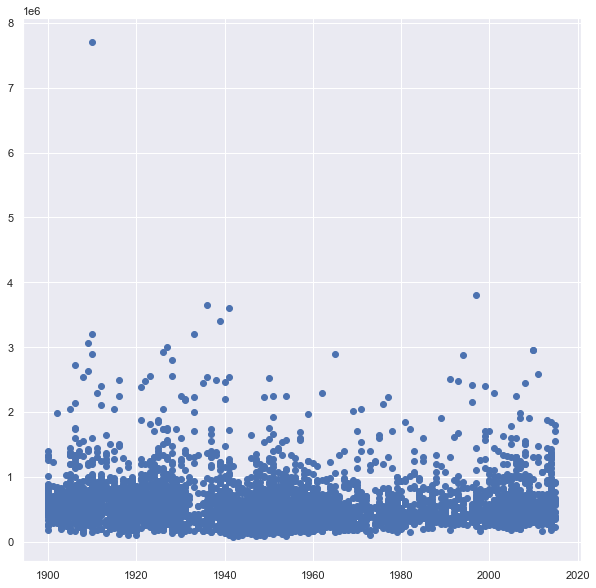

In [42]:
fig, ax = plt.subplots()
ax.scatter(yr_built, y_train)

In [43]:
X_train['sqft_living'].value_counts()

1400    51
1540    49
1320    48
1270    48
1660    46
        ..
2015     1
4000     1
1909     1
3940     1
4020     1
Name: sqft_living, Length: 499, dtype: int64

In [44]:
X_train['zipcode'].value_counts()

98103    404
98115    372
98117    371
98118    333
98133    321
98155    303
98125    278
98126    237
98106    230
98144    228
98116    223
98199    198
98122    195
98112    190
98177    189
98107    187
98198    182
98168    178
98146    177
98178    176
98136    168
98166    165
98105    151
98119    122
98108    116
98188     91
98109     70
98102     69
98148     37
Name: zipcode, dtype: int64

In [45]:
sqft_1400 = X_train.loc[df_seattle2['sqft_living']==1400]
sqft_1400

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
20707,8024200681,7/3/2014,3,1.50,1400,1022,3.0,NO,NONE,Average,8 Good,1400,0.0,2007,98115,47.6989,-122.317,1270,1205
557,236400320,7/15/2014,4,1.00,1400,7242,1.5,NO,NONE,Average,7 Average,1400,0.0,1959,98188,47.4339,-122.291,1310,7314
4782,7417700664,4/8/2015,4,2.00,1400,7140,1.0,NO,NONE,Average,7 Average,1400,0.0,1969,98155,47.7719,-122.309,1610,10500
3428,6855700115,6/26/2014,3,1.50,1400,8840,1.0,NO,NONE,Good,6 Low Average,1400,0.0,1952,98125,47.7273,-122.309,1260,8840
2530,1232000810,3/26/2015,3,2.50,1400,4800,1.0,NO,NONE,Average,7 Average,1200,200.0,1921,98117,47.6865,-122.379,1440,3840
2173,7443000640,9/12/2014,3,1.75,1400,2003,1.0,NO,NONE,Good,8 Good,700,700.0,1908,98119,47.6508,-122.368,1370,1281
17898,9158100040,8/8/2014,2,1.00,1400,8220,1.0,NO,NONE,Average,7 Average,1400,0.0,1949,98133,47.7228,-122.357,1760,8220
11950,123039128,9/4/2014,4,1.00,1400,9384,1.5,NO,NONE,Good,6 Low Average,1400,0.0,1948,98106,47.5166,-122.361,1600,8432
908,7625701891,8/6/2014,3,1.00,1400,4800,1.0,NO,NONE,Good,6 Low Average,700,700.0,1917,98136,47.5499,-122.391,1470,6000
2848,1773101335,11/3/2014,3,2.50,1400,4400,1.0,NO,NONE,Average,7 Average,1400,0.0,1930,98106,47.5530,-122.365,1060,4400


In [46]:
sqft_1400_price = sqft_1400.join(y_train)

In [47]:
sqft_1400_price

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
20707,8024200681,7/3/2014,3,1.50,1400,1022,3.0,NO,NONE,Average,8 Good,1400,0.0,2007,98115,47.6989,-122.317,1270,1205,425000.0
557,236400320,7/15/2014,4,1.00,1400,7242,1.5,NO,NONE,Average,7 Average,1400,0.0,1959,98188,47.4339,-122.291,1310,7314,238000.0
4782,7417700664,4/8/2015,4,2.00,1400,7140,1.0,NO,NONE,Average,7 Average,1400,0.0,1969,98155,47.7719,-122.309,1610,10500,220000.0
3428,6855700115,6/26/2014,3,1.50,1400,8840,1.0,NO,NONE,Good,6 Low Average,1400,0.0,1952,98125,47.7273,-122.309,1260,8840,357250.0
2530,1232000810,3/26/2015,3,2.50,1400,4800,1.0,NO,NONE,Average,7 Average,1200,200.0,1921,98117,47.6865,-122.379,1440,3840,537000.0
2173,7443000640,9/12/2014,3,1.75,1400,2003,1.0,NO,NONE,Good,8 Good,700,700.0,1908,98119,47.6508,-122.368,1370,1281,460000.0
17898,9158100040,8/8/2014,2,1.00,1400,8220,1.0,NO,NONE,Average,7 Average,1400,0.0,1949,98133,47.7228,-122.357,1760,8220,401000.0
11950,123039128,9/4/2014,4,1.00,1400,9384,1.5,NO,NONE,Good,6 Low Average,1400,0.0,1948,98106,47.5166,-122.361,1600,8432,325000.0
908,7625701891,8/6/2014,3,1.00,1400,4800,1.0,NO,NONE,Good,6 Low Average,700,700.0,1917,98136,47.5499,-122.391,1470,6000,435000.0
2848,1773101335,11/3/2014,3,2.50,1400,4400,1.0,NO,NONE,Average,7 Average,1400,0.0,1930,98106,47.5530,-122.365,1060,4400,399950.0


In [49]:
yr_built_1400 = sqft_1400_price['yr_built']
price_1400 = sqft_1400_price['price']

In [50]:
formula = 'price_1400 ~ yr_built_1400'
sqft_1400_model = sm.formula.ols(formula=formula, data=sqft_1400_price).fit()
sqft_1400_summ = yr_built_model.summary()
sqft_1400_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     20.80
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           5.20e-06
Time:                        13:03:49   Log-Likelihood:                -84598.
No. Observations:                5961   AIC:                         1.692e+05
Df Residuals:                    5959   BIC:                         1.692e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.803e+06   2.77e+05      6.504      0.000    1.26e+06    2.35e+06
yr_built    -646.4575    141.748     -4.561      0.000    -924.335    -368.580
==============================================================================
Omnibus:                     5496.912   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434118.143
Skew:                           4.157   Prob(JB):                         0.00
Kurtosis:                      43.972   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

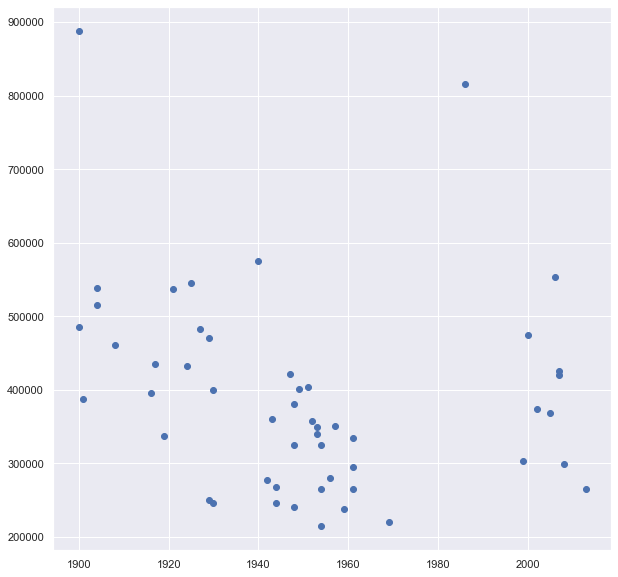

In [51]:
plt.scatter(yr_built_1400, price_1400)

In [52]:
def sqft_yr_built_price(sqft):
    sqft_num = df_seattle2.loc[df_seattle2['sqft_living']==sqft] 
    sqft_num_price = sqft_num.join(y_train)
    yr_built_sqft = sqft_num_price['yr_built']
    price_sqft = sqft_num_price['price']
    formula = 'price_sqft ~ yr_built_sqft'
    sqft_model = sm.formula.ols(formula=formula, data=sqft_num_price).fit()
    sqft_summ = sqft_model.summary()
    scatter_plot = plt.scatter(yr_built_sqft, price_sqft)
    plt.xlabel('Year was built')
    plt.ylabel('Price')
    return sqft_summ

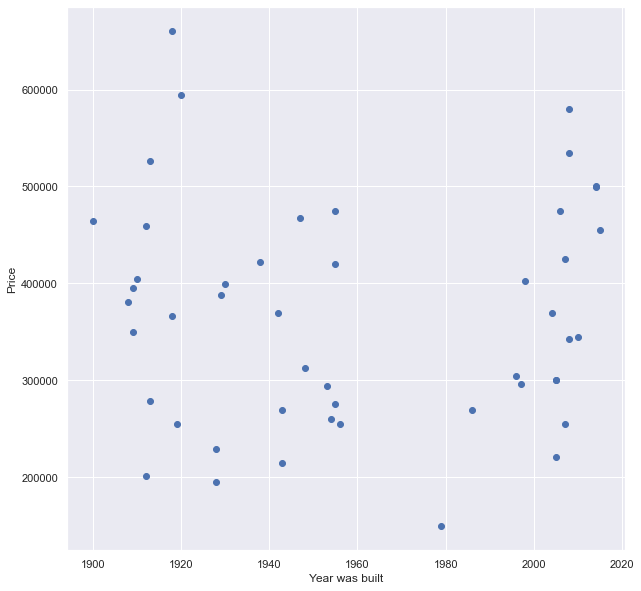

In [53]:
sqft_price = sqft_yr_built_price(1320)

In [ ]:
sqft_price

In [54]:
def sqft_zip_yr_built_price(sqft, zipcode):
    sqft_num = df_seattle2.loc[df_seattle2['sqft_living']==sqft] 
    zipcode_seattle = sqft_num.loc[sqft_num['zipcode']==zipcode]
    sqft_zip_price = zipcode_seattle.join(y_train)
    yr_built_sqft_zip = sqft_zip_price['yr_built']
    price_sqft_zip = sqft_zip_price['price']
    formula = 'price_sqft_zip ~ yr_built_sqft_zip'
    sqft_model = sm.formula.ols(formula=formula, data=sqft_zip_price).fit()
    sqft_summ = sqft_model.summary()
    scatter_plot = plt.scatter(yr_built_sqft_zip, price_sqft_zip)
    return sqft_summ

C:\Users\YueYu\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


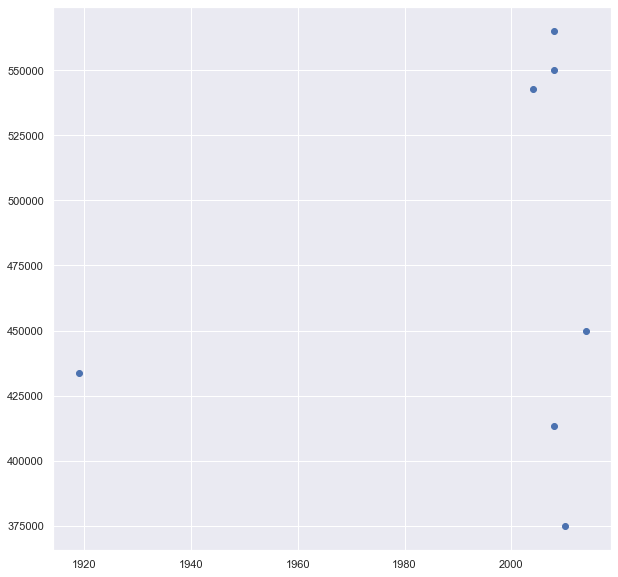

In [55]:
sqft_1540 = sqft_zip_yr_built_price(1540,98103)

In [ ]:
sqft_1540

In [ ]:
df_seattle2

In [ ]:
sqft_1540 = df_seattle2.loc[df_seattle2['sqft_living']==1540]
sqft_1540_price = sqft_1540.join(y_train)
sqft_1540_price

In [ ]:
yr_built_1540 = df_seattle2.loc[df_seattle2['sqft_living']==1540]['yr_built']
price_1540 = sqft_1540_price['price']

In [ ]:
plt.scatter(yr_built_1540, price_1540)

## Checking the correlation between year was built and price with same grade

In [ ]:
def grade_yr_built_price(grade):
    grade_num = df_seattle2.loc[df_seattle2['grade']==grade] 
    grade_num_price = grade_num.join(y_train)
    yr_built_grade = grade_num_price['yr_built']
    price_grade = grade_num_price['price']
    formula = 'price_grade ~ yr_built_grade'
    grade_model = sm.formula.ols(formula=formula, data=grade_num_price).fit()
    grade_summ = grade_model.summary()
    scatter_plot = plt.scatter(yr_built_grade, price_grade)
    plt.xlabel('Year was built')
    plt.ylabel('Price')
    return grade_summ

In [ ]:
grade_ls = ['10 Very Good','11 Excellent', '12 Luxury', '13 Mansion', '4 Low','5 Fair', 
            '6 Low Average', '8 Good', '9 Better']
house_grade = grade_yr_built_price('8 Good')

In [ ]:
house_grade

## Checking the correlation between year was built and price with same condition

In [ ]:
df_seattle2 = df_seattle2.join(df_seattle['condition'])
df_seattle2.head()

In [ ]:
def cond_yr_built_price(condition, grade):
    condition_df = df_seattle2.loc[df_seattle2['condition']==condition]
    condition_grade = condition_df.loc[condition_df['grade']==grade]
    condition_grade_price = condition_grade.join(y_train)
    yr_built_cond_grade = condition_grade_price['yr_built']
    price_condition_grade = condition_grade_price['price']
    formula = 'price_condition_grade ~ yr_built_cond_grade'
    cond_grade_model = sm.formula.ols(formula=formula, data=condition_grade_price).fit()
    cond_grade_summ = cond_grade_model.summary()
    scatter_plot = plt.scatter(yr_built_cond_grade, price_condition_grade)
    plt.xlabel('Year was built')
    plt.ylabel('Price')
    return cond_grade_summ

In [ ]:
df_seattle['condition'].value_counts()
grade_ls = ['10 Very Good','11 Excellent', '12 Luxury', '13 Mansion', '4 Low','5 Fair', 
            '6 Low Average','7 Average', '8 Good', '9 Better']

In [ ]:
house_condition = cond_yr_built_price('Good', '9 Better')

In [ ]:
house_condition

In [56]:
sqft = df_seattle2['sqft_living']
sqft_lot = df_seattle2['sqft_lot']

formula_sqft = 'y_train ~ sqft + sqft_lot'
sqft_lr =  sm.formula.ols(formula=formula_sqft, data=df_seattle2).fit()
sqft_summ = sqft_lr.summary()

In [57]:
sqft_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3497.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:04:30   Log-Likelihood:                -82294.
No. Observations:                5961   AIC:                         1.646e+05
Df Residuals:                    5958   BIC:                         1.646e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.905e+04   7764.710     -2.454      0.014   -3.43e+04   -3833.346
sqft         328.0725      3.992     82.184      0.000     320.247     335.898
sqft_lot      -5.3331      0.596     -8.942      0.000      -6.502      -4.164
==============================================================================
Omnibus:                     3438.790   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109780.826
Skew:                           2.197   Prob(JB):                         0.00
Kurtosis:                      23.559   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
sqft_15 = df_seattle2['sqft_living15']
sqft_15_lot = df_seattle2['sqft_lot15']

formula_sqft15 = 'y_train ~ sqft_15 + sqft_15_lot'
sqft15_lr = sm.formula.ols(formula=formula_sqft15, data=df_seattle2).fit()
sqft15_summ = sqft15_lr.summary()

In [59]:
sqft15_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     2036.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:04:37   Log-Likelihood:                -83056.
No. Observations:                5961   AIC:                         1.661e+05
Df Residuals:                    5958   BIC:                         1.661e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.924e+05   1.23e+04    -15.593      0.000   -2.17e+05   -1.68e+05
sqft_15       464.6622      7.395     62.838      0.000     450.166     479.158
sqft_15_lot    -8.3920      0.827    -10.142      0.000     -10.014      -6.770
==============================================================================
Omnibus:                     5438.887   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           747950.620
Skew:                           3.871   Prob(JB):                         0.00
Kurtosis:                      57.327   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

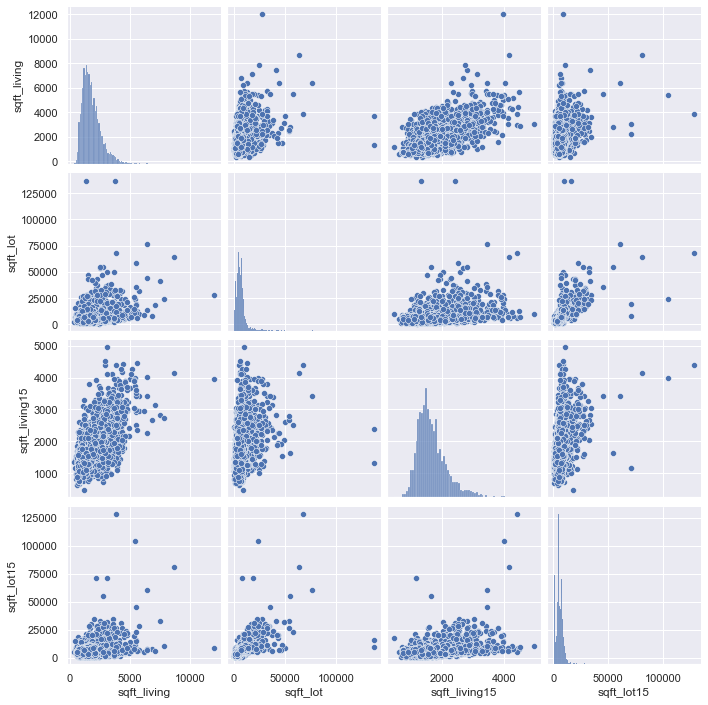

In [60]:
train_df = df_seattle2[['sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
sns.pairplot(train_df)
plt.show()

In [61]:
formula_multi = 'y_train ~ sqft + sqft_lot + sqft_15 + sqft_15_lot'
multi_lr = sm.formula.ols(formula=formula_multi, data=df_seattle2).fit()
multi_summ = multi_lr.summary()

In [62]:
multi_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2177.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:04:54   Log-Likelihood:                -81923.
No. Observations:                5961   AIC:                         1.639e+05
Df Residuals:                    5956   BIC:                         1.639e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.017e+05   1.02e+04    -19.762      0.000   -2.22e+05   -1.82e+05
sqft          249.3761      4.754     52.459      0.000     240.057     258.695
sqft_lot       -3.1389      0.768     -4.088      0.000      -4.644      -1.634
sqft_15       214.7899      7.767     27.654      0.000     199.564     230.016
sqft_15_lot    -8.2859      0.927     -8.935      0.000     -10.104      -6.468
==============================================================================
Omnibus:                     3988.870   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           228485.433
Skew:                           2.542   Prob(JB):                         0.00
Kurtosis:                      32.901   Cond. No.                     3.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
sqft_model_df = df_seattle2[['sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=8)
sqft_model = LinearRegression()
sqft_model_scores = cross_validate(
    estimator=sqft_model,
    X=sqft_model_df,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

model_for_RFECV = LinearRegression()

multi_sqft = RFECV(model_for_RFECV, cv=splitter)
multi_sqft.fit(sqft_model_df, y_train)

RFECV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.25, train_size=None),
      estimator=LinearRegression())

In [65]:
print("Was the column selected?")
for index, col in enumerate(sqft_model_df.columns):
    print(f"{col}: {multi_sqft.support_[index]}")

Was the column selected?
sqft_living: True
sqft_lot: True
sqft_living15: True
sqft_lot15: True


In [66]:
X_test_final = X_test[['sqft_living','sqft_lot','sqft_living15','sqft_lot15']]

multi_sqft.score(X_test_final, y_test)

0.5519680033149392